5


<IPython.core.display.Javascript object>


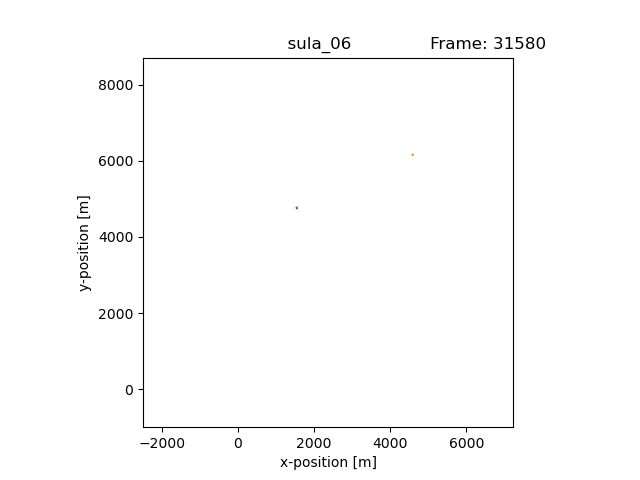

In [1]:
%matplotlib notebook
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


data = np.load('../npy/sula_data.npy', allow_pickle=True)

for number in range(1, 7):
    data_number = number - 1

    px1 = data[data_number][0][2]
    py1 = data[data_number][0][3]
    px2 = data[data_number][1][2]
    py2 = data[data_number][1][3]

    if len(data[data_number]) == 3:
        px3 = data[data_number][2][2]
        py3 = data[data_number][2][3]

    x_min = np.min([np.min(px1), np.min(px2)])
    x_max = np.max([np.max(px1), np.max(px2)])
    y_min = np.min([np.min(py1), np.min(py2)])
    y_max = np.max([np.max(py1), np.max(py2)])

    if len(data[data_number]) == 3:
        x_min = np.min([np.min(px1), np.min(px2), np.min(px3)])
        x_max = np.max([np.max(px1), np.max(px2), np.max(px3)])
        y_min = np.min([np.min(py1), np.min(py2), np.min(py3)])
        y_max = np.max([np.max(py1), np.max(py2), np.max(py3)])

    range_max = np.array([x_max - x_min, y_max - y_min]).max() * 0.5
    x_mid = (x_max + x_min) * 0.5
    y_mid = (y_max + y_min) * 0.5

    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    margin = 1000
    time_width = 20
    time_step = 10

    def update_func(i):

        ax.clear()

        ax.plot(px1[i*time_step-time_width:i*time_step], py1[i*time_step-time_width:i*time_step])
        ax.plot(px2[i*time_step-time_width:i*time_step], py2[i*time_step-time_width:i*time_step])

        if len(data[data_number]) == 3:
            ax.plot(px3[i*time_step-time_width:i*time_step], py3[i*time_step-time_width:i*time_step])

        ax.set_xlim(x_mid - range_max - margin, x_mid + range_max + margin)
        ax.set_ylim(y_mid - range_max - margin, y_mid + range_max + margin)
        ax.set_xlabel("x-position [m]")
        ax.set_ylabel("y-position [m]")

        number_frame = i*time_step
        ax.set_title('                                  sula_' +  "%02d" % number + '               Frame: ' + "%05d" % number_frame )


    # save movie
    ani = animation.FuncAnimation(fig, update_func, frames=int(len(px1)/time_step), interval=10, repeat=True)
    name = 'sula_' +  "%02d" % number + '.mp4'
    filename = '../video/sula/' + name
    ani.save(filename, writer="ffmpeg")
    plt.show()